In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [2]:
# Accesssing the data
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
# Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare
# Printing the data
titanic.head()
titanic.isnull().any()
titanic = titanic.fillna(method='ffill')
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [4]:
# Changing the Sex Column to contain numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic.Sex.unique())
titanic.Sex = le.transform(titanic.Sex)

In [5]:
# Checking the change in the Sex column
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,C123,S


In [6]:
# Selecting the features as per the given instruction
y = titanic['Survived']
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [7]:
# splitting data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# Training the Decision Tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [9]:
!pip install graphviz

In [10]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

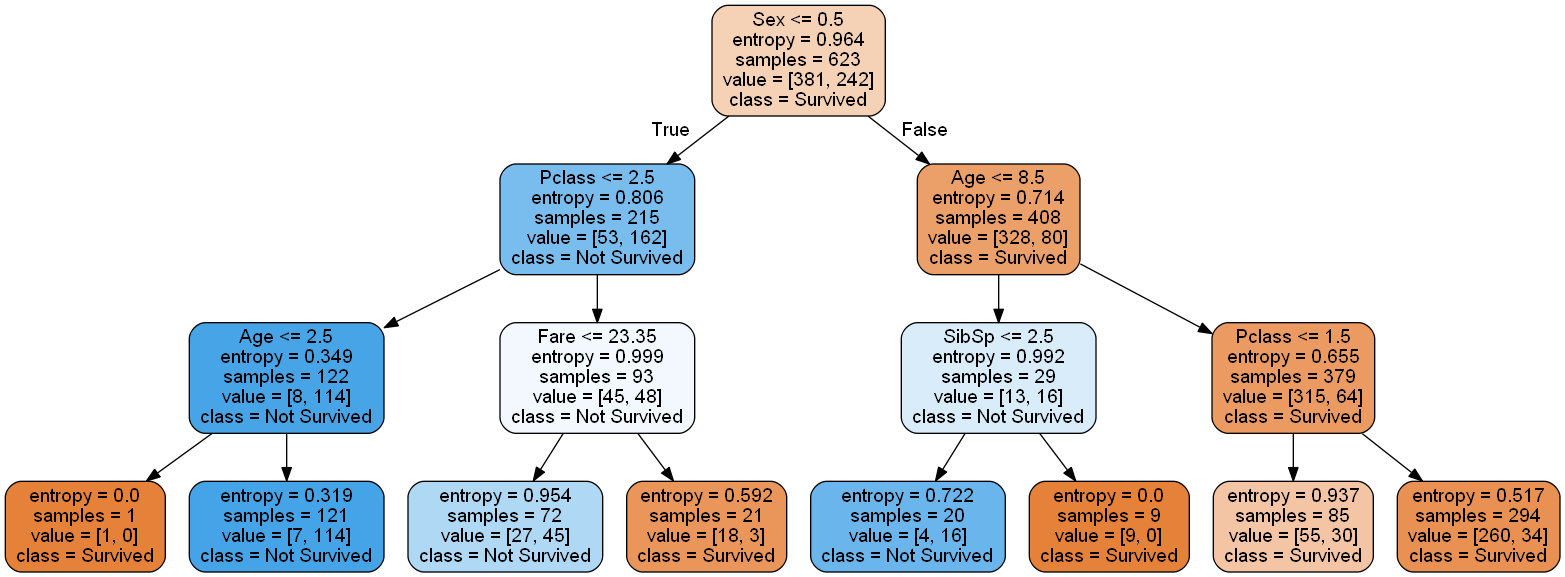

In [11]:
# Visualising the decision tree


dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'],  
                                class_names=['Survived','Not Survived'])
graph = pydotplus.graph_from_dot_data(dot_data) 



display(Image(graph.create_png()))

In [12]:
# Create PDF
graph.write_pdf("titanic.pdf")

# Create PNG
graph.write_png("titanic.png")

True

In [13]:
# Evaluation of the Model
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))


accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 51
Accuracy: 0.81


In [14]:
# CROSS VALIDATION using Repeated KFold
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=len(X),  # Number of elements
                   n_repeats = 10,   # Desired number of cv folds
                   random_state = 12)

fold_accuracy = []   
for train_fold, valid_fold in cv.split(X):
    X_train, X_test = X.loc[train_fold], X.loc[valid_fold]
    y_train, y_test = y.loc[train_fold], y.loc[valid_fold]   
    model = dtree.fit(X = X_train,y = y_train)
    valid_acc = model.score(X = X_test,y = y_test)
    fold_accuracy.append(valid_acc) 
    
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Average accuracy:  0.8024691358024691


In [15]:
# Validation Using cross_val_score function
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.82222222 0.83333333 0.7752809  0.85393258 0.82022472 0.7752809
 0.79775281 0.80898876 0.84269663 0.81818182]
Average accuracy:  0.8147894677108161
